In [46]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Загрузка данных

In [47]:
from google.colab import drive

drive.mount('/content/drive/')

students = pd.read_csv('/content/drive/MyDrive/students.csv', sep=';')

display(students)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Анализ данных

In [48]:
# размер датасета, 4424 записей, 37 столбцов

students.shape

(4424, 37)

In [49]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [50]:
students.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [51]:
students['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [52]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

students['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


Делаем балансировку для лучшей классификации

In [53]:
from sklearn.utils import resample


# 1. Разделяем данные по классам
graduate = students[students['Target'] == 'Graduate']
dropout = students[students['Target'] == 'Dropout']
enrolled = students[students['Target'] == 'Enrolled']

# 2. Определяем максимальное количество образцов среди классов (Graduate)
max_count = graduate.shape[0]  # 2209

# 3. Выполняем oversampling для классов 'Dropout' и 'Enrolled'
dropout_oversampled = resample(
    dropout,
    replace=True,            # Разрешаем повторное использование образцов
    n_samples=max_count,     # Количество образцов после балансировки
    random_state=42          # Фиксируем случайное состояние для воспроизводимости
)

enrolled_oversampled = resample(
    enrolled,
    replace=True,
    n_samples=max_count,
    random_state=42
)

# 4. Объединяем сбалансированные классы с оригинальным классом 'Graduate'
balanced_students = pd.concat([graduate, dropout_oversampled, enrolled_oversampled])

# 5. Перемешиваем данные для обеспечения случайности
balanced_students = balanced_students.sample(frac=1, random_state=42).reset_index(drop=True)

# Проверяем распределение классов после балансировки
print(balanced_students['Target'].value_counts())

Target
Enrolled    2209
Dropout     2209
Graduate    2209
Name: count, dtype: int64


# Визуализация данных

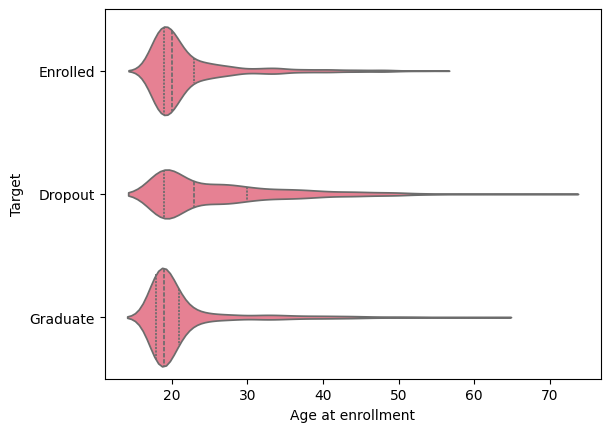

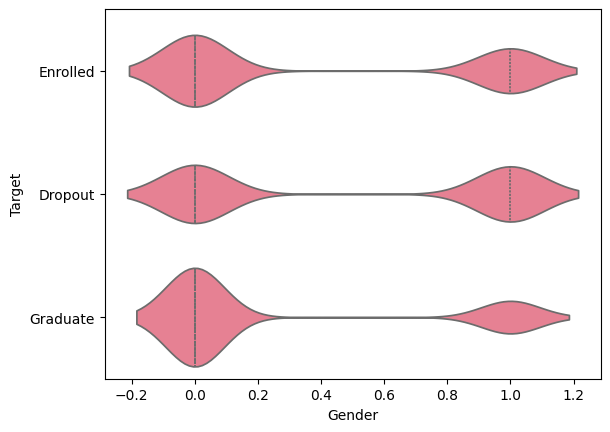

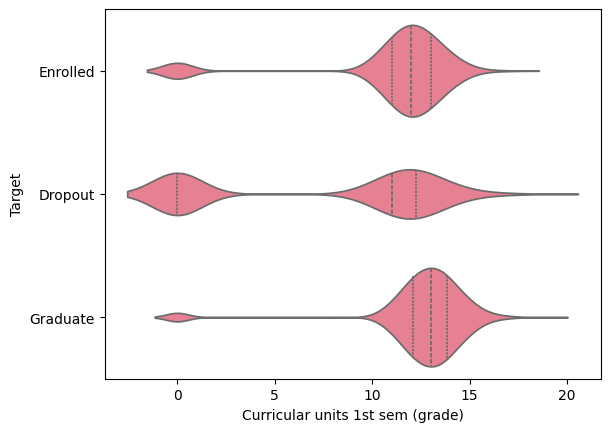

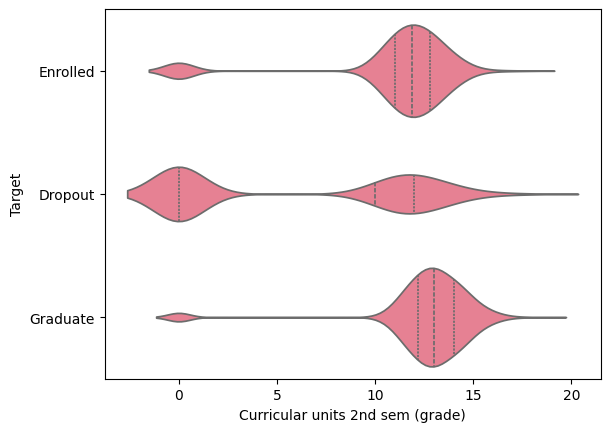

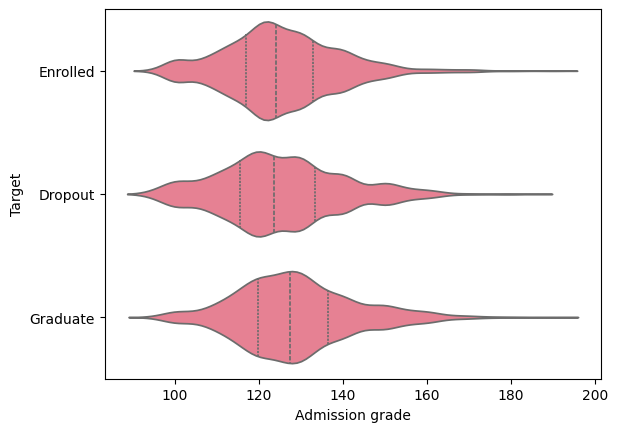

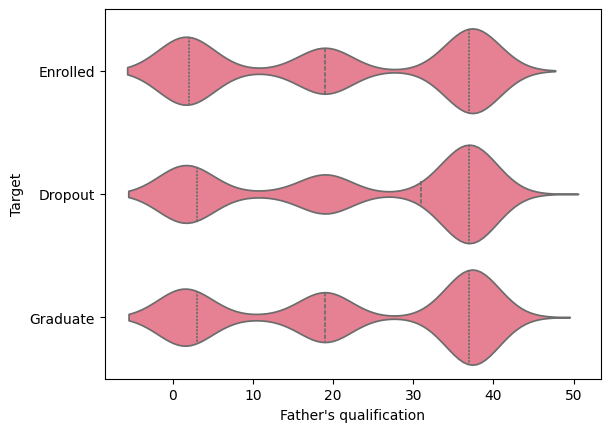

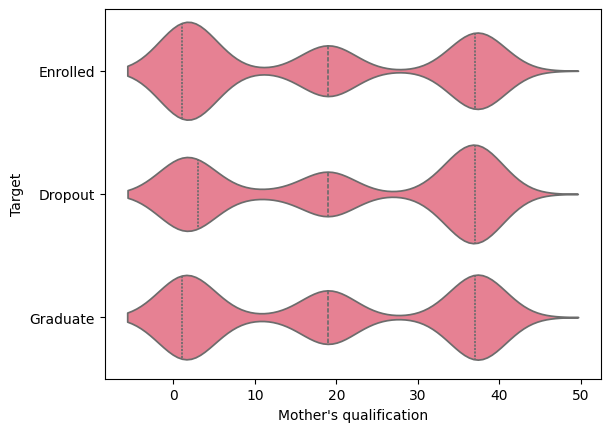

In [54]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='Target', x='Age at enrollment', data=balanced_students, inner='quartile')
plt.show()
sns.violinplot(y='Target', x='Gender', data=balanced_students, inner='quartile')
plt.show()
sns.violinplot(y='Target', x='Curricular units 1st sem (grade)', data=balanced_students, inner='quartile')
plt.show()
sns.violinplot(y='Target', x='Curricular units 2nd sem (grade)', data=balanced_students, inner='quartile')
plt.show()
sns.violinplot(y='Target', x='Admission grade', data=balanced_students, inner='quartile')
plt.show()
sns.violinplot(y='Target', x='Father\'s qualification', data=balanced_students, inner='quartile')
plt.show()
sns.violinplot(y='Target', x='Mother\'s qualification', data=balanced_students, inner='quartile')
plt.show()

In [55]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

# sns.pairplot(students, hue='Target', markers='+')
# plt.show()

<Axes: xlabel='Admission grade', ylabel='Age at enrollment'>

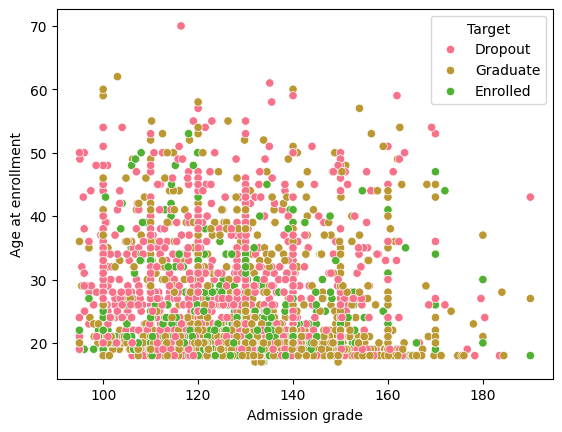

In [56]:
sns.scatterplot(x='Admission grade', y='Age at enrollment', hue='Target', data=students)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


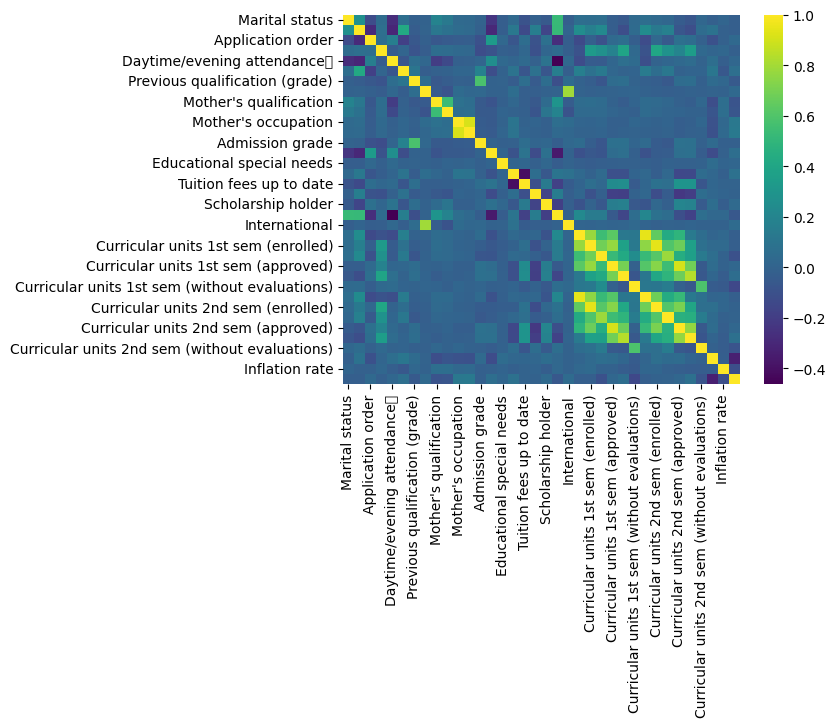

In [57]:
corr_matrix = students.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.show()

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Target.

В X складываем весь набор данных без целевой переменной.

In [58]:
X = balanced_students.drop(['Target'], axis=1)
y = balanced_students['Target']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (6627, 36) | y shape: (6627,) 


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [59]:
import scipy.stats as stats

y_mapped = y.map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.13128537934549472, pvalue=0.895553543676678, df=6625.0)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.0, pvalue=1.0, df=6625.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [61]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.668929 (0.017614)
LDA: 0.702510 (0.021514)
KNN: 0.630440 (0.025605)
CART: 0.864363 (0.013582)
NB: 0.624035 (0.014293)
SVC: 0.849835 (0.012306)


Classification and Regression Trees (CART) и Support Vector Machines (SVM) классификатор показали лучшие метрики среди всех алгоритмов.
Далее работаем с CART.

Давайте обучим модель CART на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель CART
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [62]:
sk_cart = DecisionTreeClassifier()
sk_cart.fit(X_train, y_train)
sk_cart_pred_res = sk_cart.predict(X_test)
#sk_transformed = sk_cart.transform(X_train)
sk_cart_accuracy = accuracy_score(y_test, sk_cart_pred_res)

print(f'sk LDA accuracy: {sk_cart_accuracy}')
print(f'sk LDA prediction: {sk_cart_pred_res}')
#print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.8650075414781297
sk LDA prediction: [0 2 2 ... 0 1 0]


## Визуализация решения

<Axes: title={'center': 'LDA surface with original features'}>

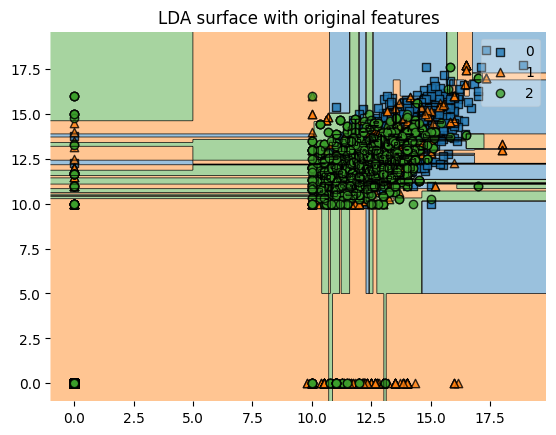

In [63]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].values

y_2d = y_s.values


sk_lda1 = DecisionTreeClassifier()
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

Accuracy: 0.61
Recall (weighted): 0.61
Precision (weighted): 0.59
AUC: 0.66
Detail:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       667
           1       0.62      0.68      0.65       428
           2       0.22      0.18      0.19       233

    accuracy                           0.61      1328
   macro avg       0.51      0.52      0.52      1328
weighted avg       0.59      0.61      0.60      1328



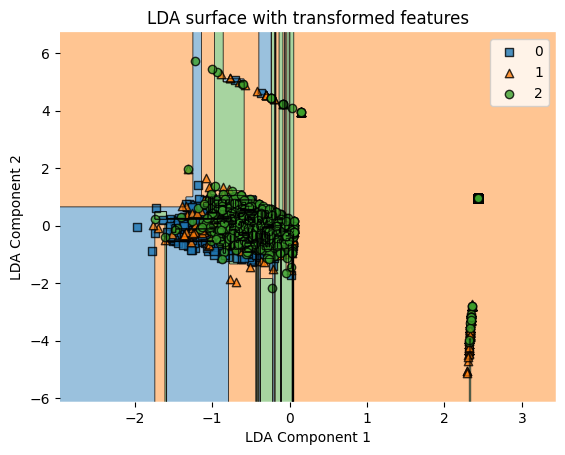

In [64]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import roc_auc_score
df = students["Target"].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})
ys = df.values

# Выбор признаков
Xs = students[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]

# Инициализация LDA
lda = LinearDiscriminantAnalysis()

# Обучение и трансформация признаков
X1_lda = lda.fit_transform(Xs, ys)

# Разделение на обучающую и тестовую выборки
X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0, test_size=0.3)

# Инициализация и обучение дерева решений
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X1_lda_train, y1_train)

# Предсказание на тестовом наборе
predicted = decision_tree.predict(X1_lda_test)

# Оценка метрик
accuracy = metrics.accuracy_score(y1_test, predicted)
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")

print(f"Accuracy: {round(accuracy, 2)}")
print(f"Recall (weighted): {round(recall, 2)}")
print(f"Precision (weighted): {round(precision, 2)}")

# Расчёт AUC (требуется вероятности для каждого класса)
if hasattr(decision_tree, "predict_proba"):
    predicted_proba = decision_tree.predict_proba(X1_lda_test)
    auc = roc_auc_score(y1_test, predicted_proba, multi_class='ovr')
    print(f"AUC: {round(auc, 2)}")
else:
    print("Модель не поддерживает predict_proba, поэтому AUC не может быть рассчитан.")

# Отчёт классификации
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y1_test)]))

# Визуализация границ принятия решений
plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=decision_tree)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(loc='upper right')
plt.show()